## [03] 앙상블 학습

앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 예측을 도출하는 방법. 

대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있음. 대표적으로 랜덤포레스트와 그래디언트 부스팅 알고리즘. 

부스팅 계열의 앙상블 알고리즘의 인기. XGBoost, LightGBM, 스태킹 등등..

---------------------------------------

앙상블 학습의 유형은 전통적으로 보팅, 배깅, 부스팅으로 나눌 수 있음. 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있음. 
 - 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식. 
 - 이 둘의 차이점은 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅은 분류기가 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 다르게 가져가 학습을 수행.

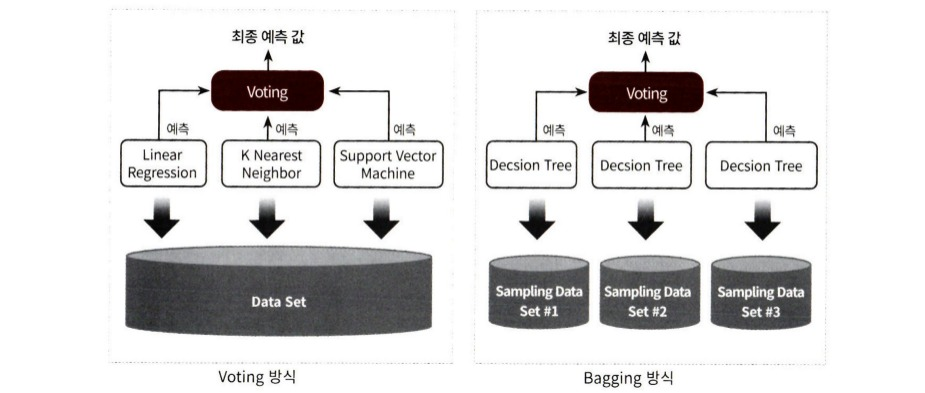

 왼쪽그림의 voting 방식은 3개의 다른 종류의 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정.
 
 오른쪽 그림의 Bagging 방식은 단일 알고리즘으로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅 방식과는 다름. 
 
     - 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑 분할방식이라고 함. 
     - 배깅 앙상블 방식 : 부트 스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정. 

 - 부스팅은 여러개의 분류기가 순차적으로 학습을 수행하되, 앞에서 예측이 틀린 데이터에 대해서는 가중치를 부여하면서 학습과 예측을 진행. **그래디언트 부스트, XGBoost,LightGBM**

**[보팅 유형 - 하드 보팅과 소프트 보팅]**

1. 하드 보팅은 다수결의 원칙과 비슷. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정.
2. 소프팅 보팅은 분류기들의 레이블 값 결정확률을 보두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로.(일반적으로 소프트 보팅이 적용)

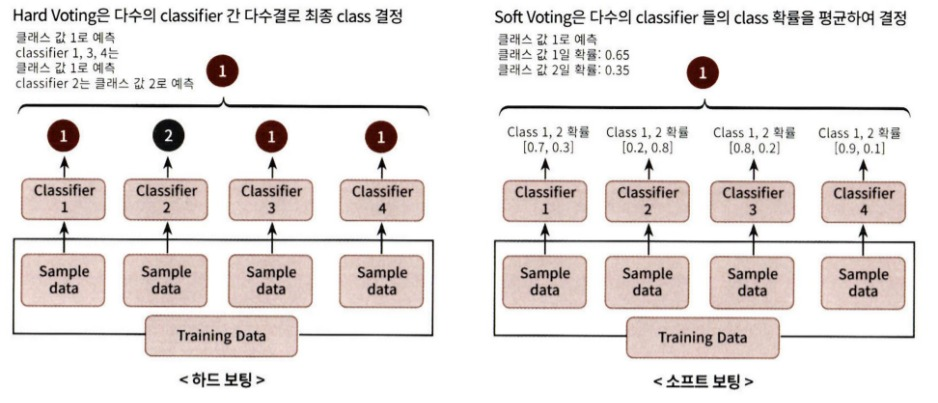

**[보팅 분류기]**

: 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공

: 위스콘신 유방암 데이터 세트를 예측 분석. 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만듦.

In [9]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


 - VotinfClassifier 클래스는 주요 생성 인자로 estimator와 voting값을 입력 받음. 
  - estimators는 보팅에 사용될 여러개의 Classifier객체들을 튜플형식으로 입력 받음
  - voting은 하드/소프트 보팅 방식을 적용.

In [13]:
#개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습/예측/평가.
classifiers = [lr_clf,knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.947368
LogisticRegression 정확도: 0.938596
KNeighborsClassifier 정확도: 0.938596


C:\Users\june0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\june0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

보팅으로 여러개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측성능이 향상되지는 않음. 

ML 모델의 성능은 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 됨. 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요과제.

## [04] 랜덤 포레스트 

**[랜덤 포레스트의 개요 및 실습]**

배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘. 배깅의 대표적인 알고리즘은 랜덤 포레스트.

**랜덤 포레스트**의 기반 알고리즘은 결정트리로서, 여러개의 결정 트리 분류가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨. 

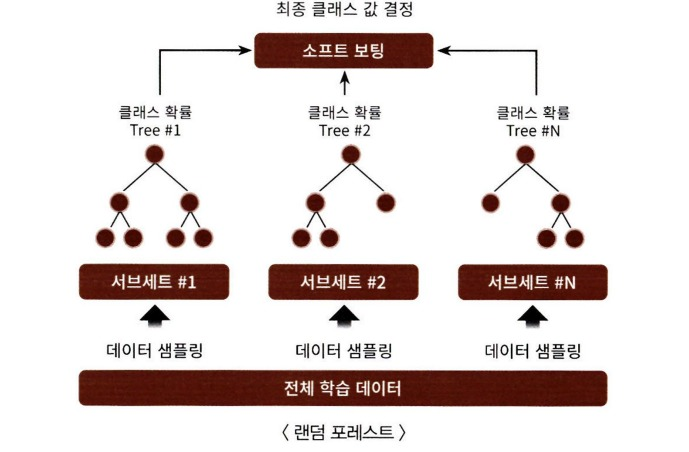

 - 여러개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑 분할방식이라고 함. 
 - 랜덤 포레스트 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어짐. 
 
ex) n_estimators = 3

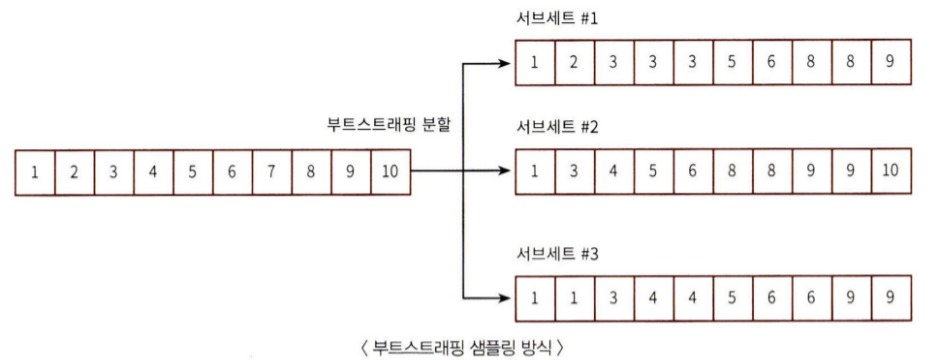

----------------------------

이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트. RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원.

In [15]:
def get_new_feature_name_df(old_feature_name_df):
    #column_name으로 중복된 컬럼명에 대해서는 중복 차수 부여, col1, col1과 같이 2개의 중복 컬럼이 있을 경우 1, 2 
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df
    
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('C:/data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('C:/data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('C:/data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('C:/data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


**[랜덤 포레스트 하이퍼 파라미터 및 튜닝]**

 - 트리기반의 앙상블 알고리즘은 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝시간이 많이 소모됨. 
     - n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정.디폴트는 10개.
     - max_features : 결정트리에 사용된 max_features 파라미터와 같음. 랜덤 포레스트의 트리를 분할하는 피처를 참조할때 sqrt만큼 참조.

-----------------------
GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝함.

그래디언트 부스팅보다 예측 성능이 약간 떨어지더라도 랜덤 포레스트로 기반 모델을 먼저 구축하는 경우가 많음. n_jobs= -1파라미터를 추가하면 모든 CPU코어를 이용해 학습할 수 있음.

In [20]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100], 'max_depth':[6,8,10,12],
         'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params,cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9180


-> n_estimators가 100, mamx_depth:10, min_samples_leaf:8, min_samples_split:8일때 91.68%의 평균 정확도가 측정.

n_estimators를 300으로 증가시키고 예측 성능을 측정.

In [21]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, 
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9165


RandomForestClassifier은 feature_importances_ 속성을 이용해 알고맂ㅁ이 선택한 피처의 중요도를 알 수 있음

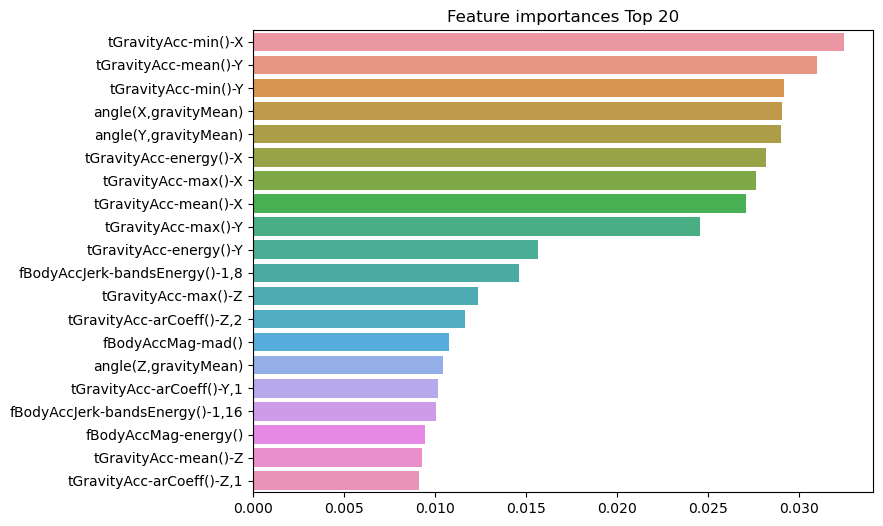

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## [05] GBM(Gradient Boosting Machine) 

**[GBM의 개요 및 실습]**

부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식. 

부스팅의 대표적인 구현은 AdaBoost와 그래디언트 부스트가 있음.

1. 에이다 부스트 : 오류데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘. 
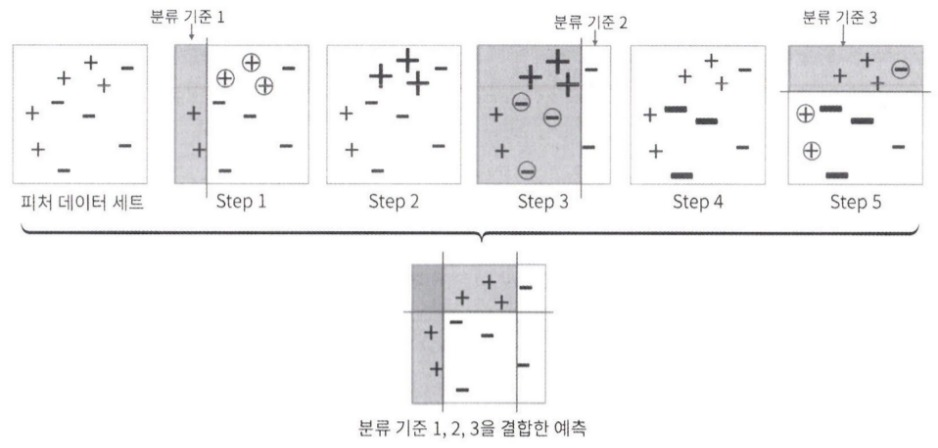

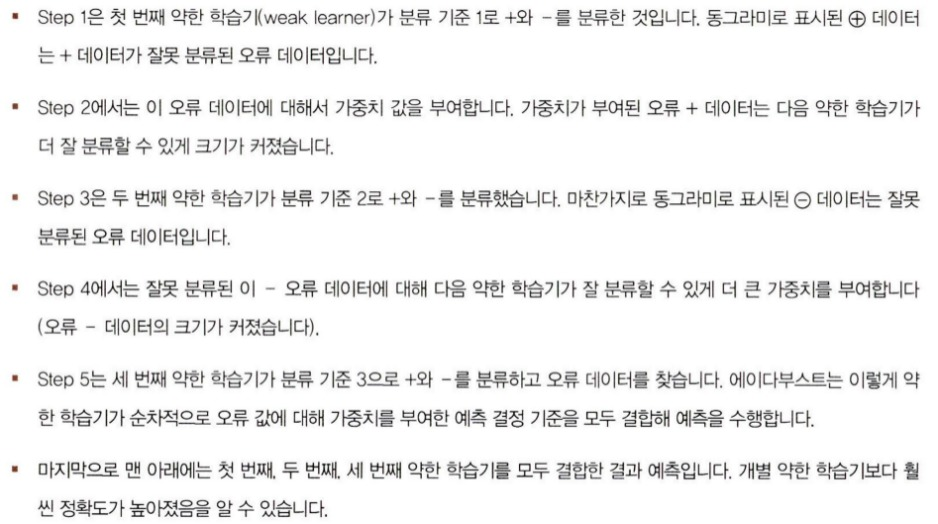

2. GBM.그래디언트 부스트

: 에이다부스트와 유사하나, 가중치 업데이트를 경사하강법을 이용함.

: 오류식 h(x) = y(결괏값) - F(x)(예측값)를 최소화하는 방향성으로 반복적으로 가중치 값을 업데이트 하는 것이 경사하강법.

: GBM은 분류와 회귀 모두 가능함. 사이킷런은 GBM기반의 분류를 위해 GradientBoostingClassifier 클래스를 제공.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 669.6초


일반적으로 GBM이 랜덤포레스트보다는 예측 성능이 뛰어남. 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요.

**[GBM 하이퍼 파라미터 및 튜닝]**

 - n_estimators, max_depth, max_features
 - loss : 경사 하강법에서 사용할 비용 함수를 지정. deviance가 기본값.
 - learning_rate : GBM이 학습을 진행할때마다 적용하는 학습률. weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수. learning_rate는 n_estimators와 상호보완적으로 조합해 사용.
 - n_estimators : weak learner의 개수. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있음.
 - subsample : weak learnenr가 학습에 사용하는 데이터의 샘플링 비율. 

In [41]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,500], 'learning_rate': [0.05,0.1]}

grid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9517


-> learning_rate가 0.05, n_estimators가 500일때 2개의 교차 검증 세트에서 90.1% 정확도가 최고로 도출.

이 설정을 그대로 테스트 데이터 세트에 적용해 예측 정확도를 확인.

In [42]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred) 
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9737


GBM은 과적합에도 강한 뛰어나 예측성능을 가진 알고리즘. 하지만 수행 시간이 오래 걸린다는 단점이 있음. 

GBM이 처음 소개된 이후 많은 알고리즘이 GBM을 기반으로 새롭게 만들어지고 있음. 가장 각광받고 있는 두개의 그래디언트 부스팅 기반 ML 패키지는 XGBoost와 LightGBM.

## [06] XGBoost(eXtra Gradient Boost) 

**[XGBoost 개요]**

: 분류에 있어서 다른 머신러닝보다 뛰어난 예측성능을 나타냄.

: XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간 및 과적합 규재 부재 등의 문제를 해결해서 매우 각광받음. 

 : xgboost 패키지 내에는 XGBoost 전용의 파이썬 패키지와 사이킷런과 호환되는 래퍼용 XGBoost가 함께 존재.
 - XGBoost 프레임워크 기반의 XGBoost : 파이썬 래퍼 XGBoosst 모듈
 - 사이킷런과 연동되는 모듈.(XGBClassifier, XGBRegressor) : 사이킷런 래퍼 XGBoost 모듈

**[XGBoost 설치하기]**

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier

**[파이썬 래퍼 XGBoost 하이퍼 파라미터]**

 : GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며, 여기에 조기중단, 과적합을 규제하기 위한 하이퍼 파라미터 등이 추가.
 
 : 파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼 파라미터는 약간 다름. 
  - 일반 파라미터 : 일반적으로 스레드의 개수나 silent모드 등의 파라미터.
  - 부스터 파라미터 : 트리 최적화, 부스팅, regularization.
  - 학습 태스크 파라미터 : 학습 수행 시의 객체 함수, 평가를 위한 지표등을 설정.

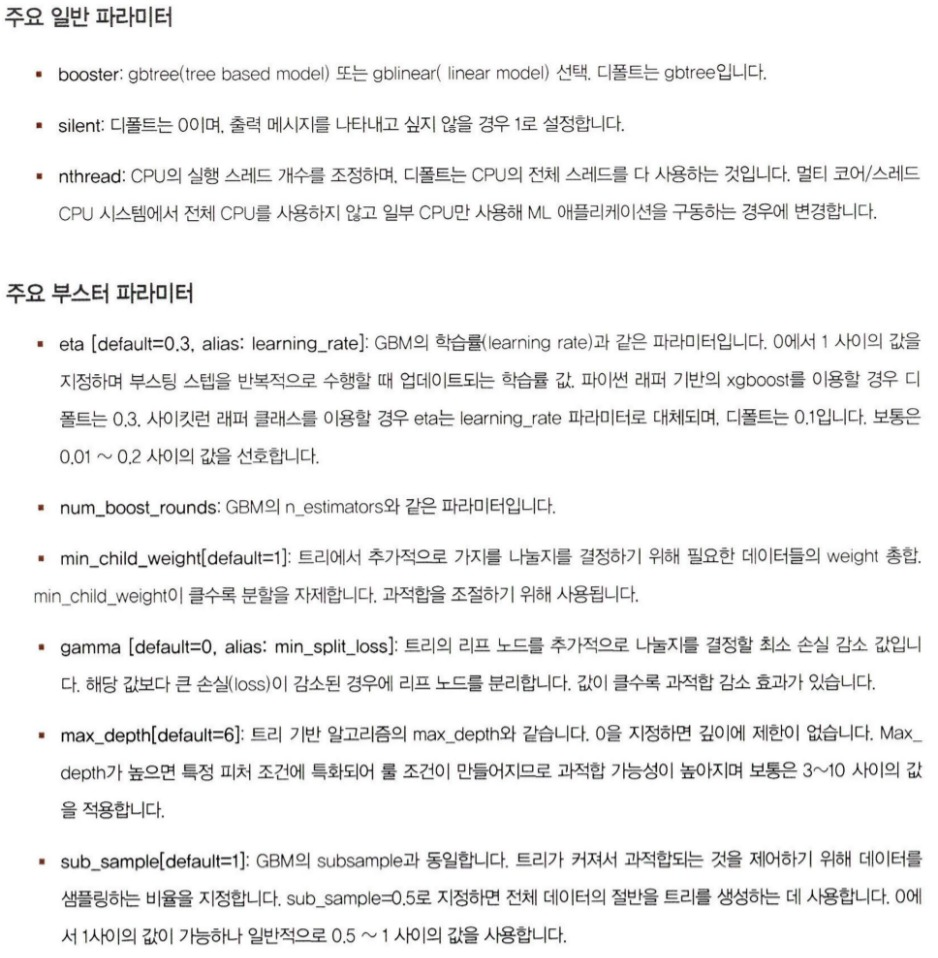

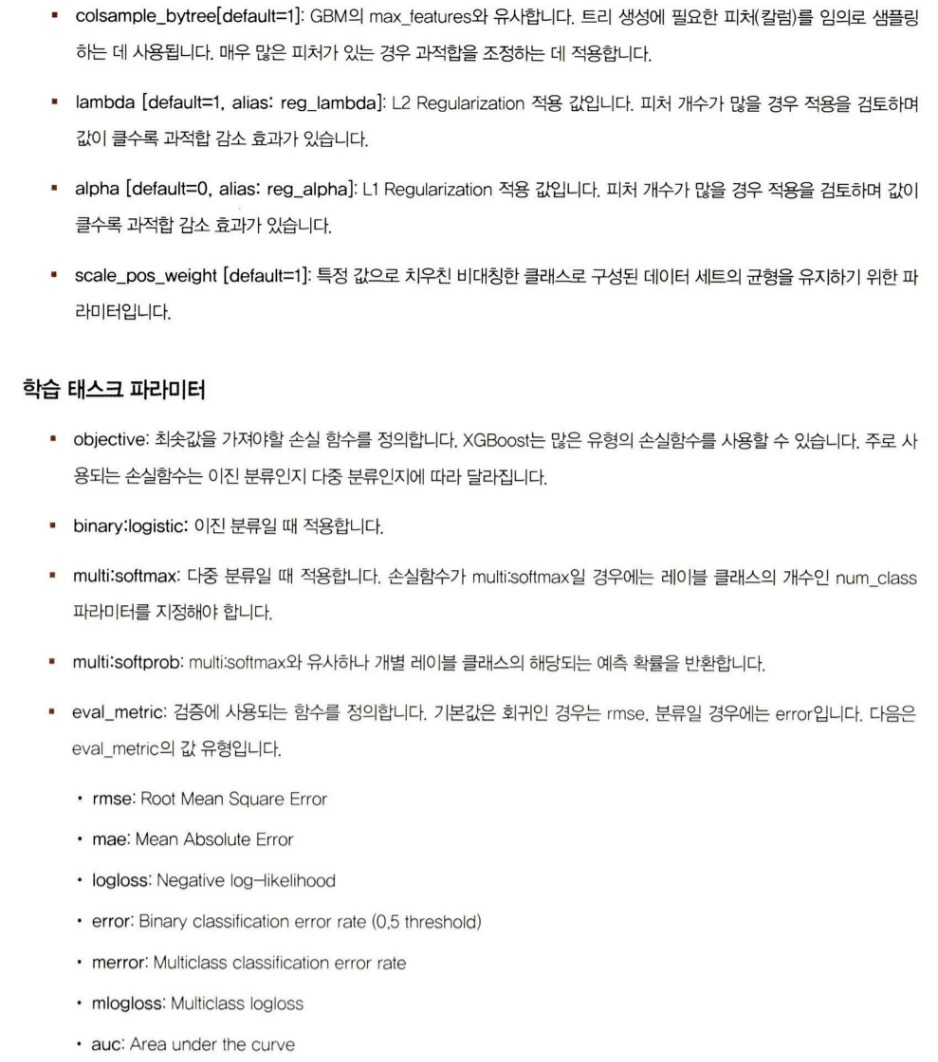

뛰어난 알고리즘일수록 파라미터를 튜닝할 필요가 적음. 

파라미터를 튜닝하는 경우의 수는 피처의 수가 매우 많거나 피처 간 상관되는 많거나 데이터 세에 따라 여러가지 특성이 있을 수 있음. 

과적합 문제가 심각한다면 

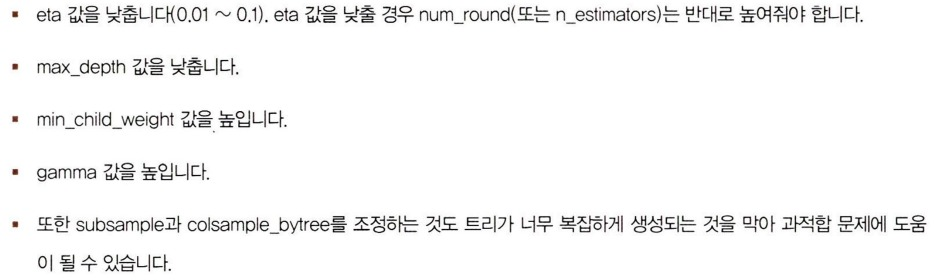

 - XGBoost 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있음. 
 - 또한 기본 GBM에서 부족한 다른 여러가지 성능 향상 기능이 있음. 그 중에 수행 속도를 향상시키기 위한 대표적인 기능으로 조기 중단 기능이 있음. 

In [28]:
import xgboost

print(xgboost.__version__)

1.7.3


**[파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측]**

: 위스콘신 유방암 데이터 세트를 활용하여 파이썬 래퍼 XGBoost API의 사용법을 살펴봄.xgboost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있음. 

In [32]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


타깃 레이블 값의 종류는 악성인 0값으로, 양성인 1값으로 됨.

In [37]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


 - 전체 데이터 세트 중 80%를 학습용으로, 20%를 테스트용으로 데이터 추출.

In [38]:
#전체 데이터 중 80%는 학습용 데이터, 20%는 테이트용 데이터 추출.
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label
                                                    , test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


 - 파이썬 래퍼 XGBoost는 사이킷런과 차이가 여러가지 있지만, 눈에 띄는 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatirx를 생성.

 - DMatrix의 주요 입력 파라미터는 data와 label.data는 피처 데이터 세트. label은 분류의 경우에는 레이블 데이터 세트, 회귀의 경우는 숫자형인 종속값 데이터 세트.

In [39]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

 - xgboost를 이용해 학습을 수행하기 전에 먼저 XGBoost의 하이퍼 파라미터를 설정. XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력. 

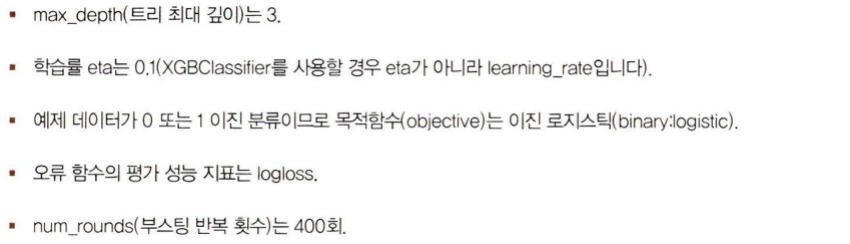

In [43]:
params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 
          'eval_metric':'logloss', 'early_stoppings':100}
num_rounds = 400

 - 위의 지정된 하이퍼 파라미터로 XGBoost모델을 학습시킴. 파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost모듈의 train() 함수에 파라미터로 전달. 
 - 학습시 XGBoost는 수행 속도를 개선하기 위해서 **조기 중단 기능**을 제공. 조기중단은 XGBoost가 수행 성능을 개선하기 위해서 더 이상의 지표 개선이 없을 경우에 num_boost_round횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것.
     - early_stopping_rounds 파라미터를 설정함. eval_set는 성능 평가를 수행할 평가용 데이터 세트를 설정. eval_metirc은 평가 세트에 적용할 성능 평가 방법.

In [45]:
#train 데이터 세트는 'train',evaluation 데이터 세트는 'eval'로 명시. 
wlist = [(dtrain, 'train'),(dtest, 'eval')]
#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달.
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                     early_stopping_rounds = 100, evals = wlist)

[17:15:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.181

 - train()으로 학습을 수행하면 반복 시 train-error와 eval-logloss가 지속적으로 감소. 
 - 이를 이용해 테스트 데이터 세트에 예측을 수행. 주의할 점은 사이킷런에 반해 xgboost의 predict()는 예측 결과를 추정할 수 있는 확률 값을 반환함.
     - 암이 악성인지, 양성인지를 판단하는 이진 분류이므로 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정함.

In [46]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


 - get_clf_eval()함수를 적용해 XGBoost모델의 예측 성능을 평가함. 

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # roc_auc 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, \
    F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870,     F1 : 0.9806, AUC:0.9951


 - xgboost 패키지에 내장된 시각화 기능을 수행. xgboost의 plot_importance() API는 피처의 중요도를 막대 그래프 형식으로 나타냄. 
      - 내장된 plot_importance() 이용 시 유의 할 점은 xgboost 넘파이 기반의 피처 데이터로 학습 시에 피처명을 제대로 알 수 가 없으므로 f0,f1와 같이 피처 순서별로 f자 뒤에 순서를 붙여서 X축에 피처들로 나열함. 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

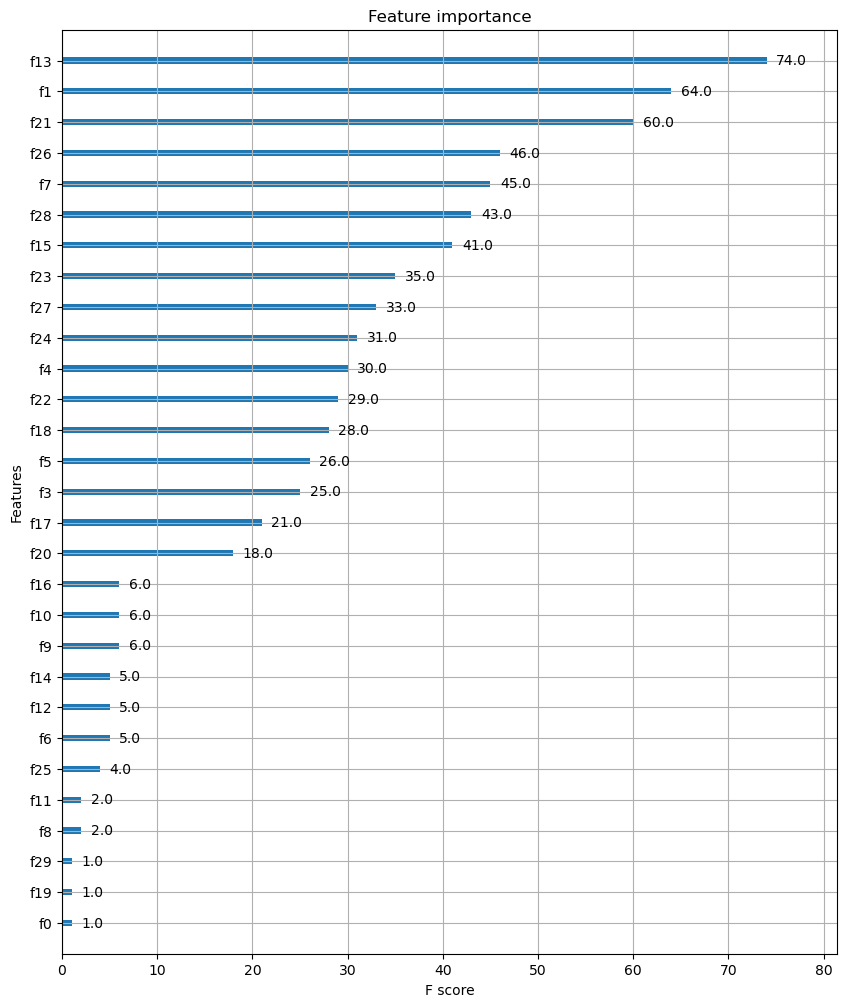

In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

 - 결정 트리에서 보여준 트리 기반 규칙 구조도 xgboost에서 시각화할 수 있음. xgboost 모듈의 to_graphviz() API를 이용. 
  - 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공.
  
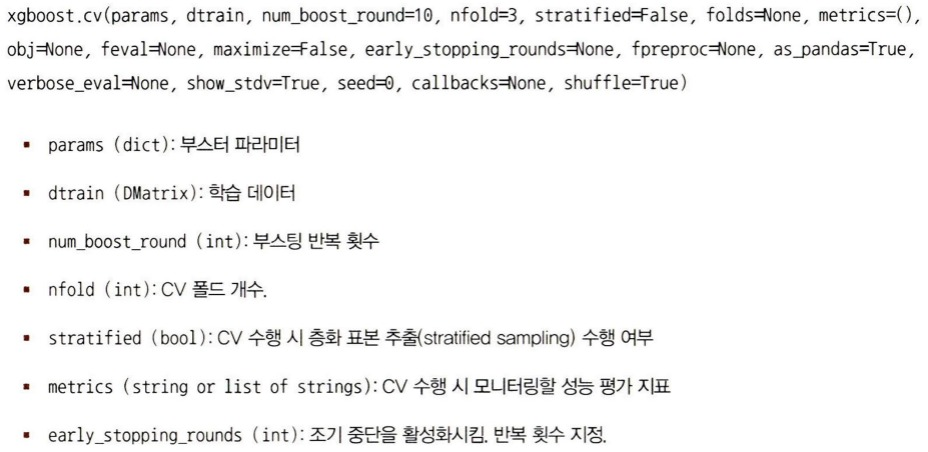

**[사이킷런 래퍼 XGBoost의 개요 및 적용]**

: XGBoost 개별 그룹은 사이킷런의 프레임워크와 연동하기 위해 사이컷런 전용의 XGBoost 래퍼 클래스를 개발. 

: 크게 분류를 위한 래퍼 클래스인 XGBClassifier, 회귀릘 위한 래퍼 클래스인 XGBRegressor.

 - 파이썬 래퍼 XGBoost와 사이킷런 래퍼 XGBoost의 하이퍼 파라미터에 약간의 차이가 있음. 
 - xgboost의 n_estimators와 num_boost_round 하이퍼 파라미터는 서로 동일한 파라미터.
 
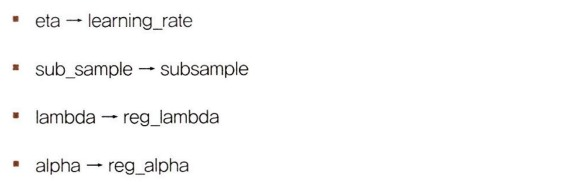

------------
 - XGBClassifier클래스의 fit(), predict(), predict_proba()를 이용해 학습과 예측을 수행.

In [51]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

 - get_clf_eval()을 이용해 사이킷런 래퍼 XGBoost로 만들어진 모델의 예측 성능 평가를 함. 

In [52]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870,     F1 : 0.9806, AUC:0.9951


 - 사이킷런 래퍼 XGBoost에서도 조기 중단 관련한 파라미터를 fit()에 입력하여 조기중단을 수행할 수 있음.

In [53]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
               eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

 - 위의 조기 중단으로 학습된 XGBClassifier의 예측 성능을 살펴봄. 조기중단이 적용되지 않은 결과보다 약간 저조한 성능을 나타냈지만 큰 차이는 아님.

In [54]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.9620, 재현율 : 0.9870,     F1 : 0.9744, AUC:0.9954


 - 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 큼.

In [57]:
#early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds=10,
               eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

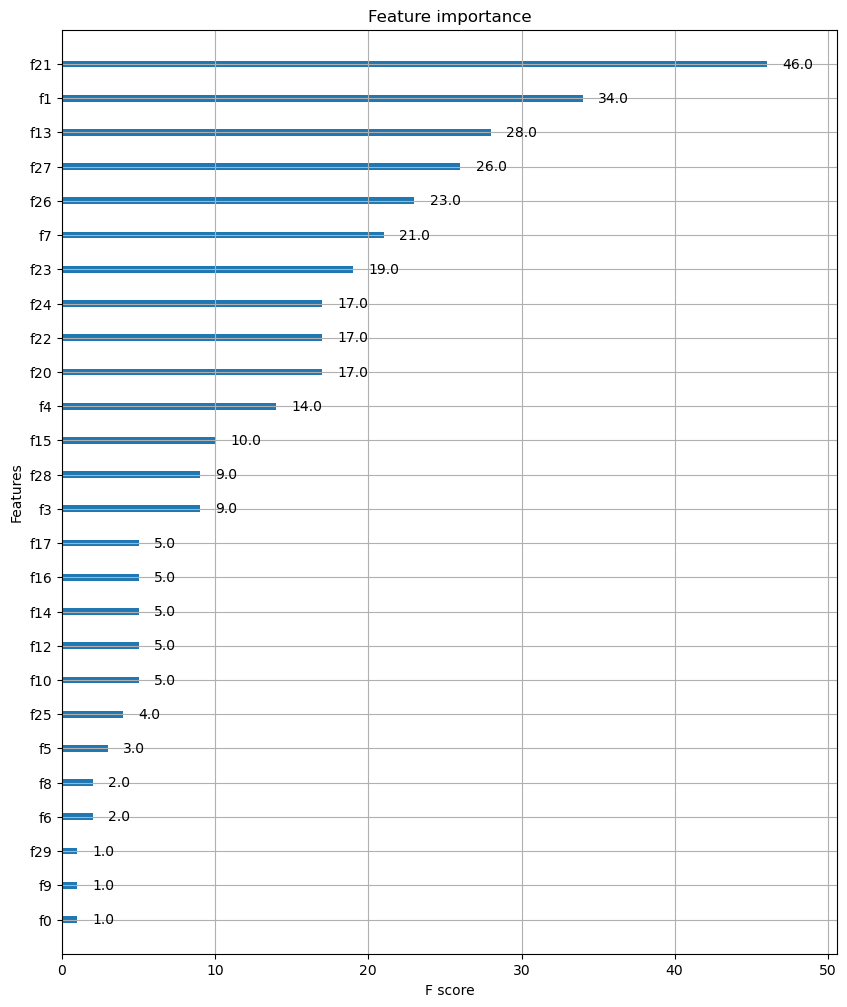

In [58]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)